In [1]:
# ✅ Step 1: Setup & Imports
import sys
sys.path.append('C:/Users/isgis/OneDrive/Desktop/NeuroKey/src')  # Import from src folder

from data_preprocessing import load_and_preprocess_data
from random_forest import train_and_save_rf
from model_explainability import load_model, explain_model

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ✅ Step 2: Load and Preprocess Data
file_path = 'C:/Users/isgis/OneDrive/Desktop/NeuroKey/data/processed/features_combined.csv'

X_train, X_test, y_train, y_test, scaler, feature_names = load_and_preprocess_data(file_path)

print("X_train shape:", X_train.shape)
print("y_train value counts:\n", y_train.value_counts())

Data Shape: (85, 7)
Columns: ['pID', 'gt', 'updrs108', 'afTap', 'sTap', 'nqScore', 'Typing speed']
X_train shape: (60, 4)
y_train value counts:
 gt
0    31
1    29
Name: count, dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Store models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Loop through models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔍 {name} Accuracy: {acc:.2%}")
    print(classification_report(y_test, y_pred, target_names=['Healthy', 'PD']))



🔍 Logistic Regression Accuracy: 87.50%
              precision    recall  f1-score   support

     Healthy       0.88      0.88      0.88         8
          PD       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16


🔍 Random Forest Accuracy: 93.75%
              precision    recall  f1-score   support

     Healthy       1.00      0.88      0.93         8
          PD       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16


🔍 Gradient Boosting Accuracy: 87.50%
              precision    recall  f1-score   support

     Healthy       0.88      0.88      0.88         8
          PD       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg    

In [4]:
voting = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('rf', models['Random Forest']),
        ('svm', models['SVM (RBF)'])
    ],
    voting='soft'
)
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))


Voting Classifier Accuracy: 0.9375



✅ Random Forest Accuracy: 93.75%

✅ Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      0.88      0.93         8
          PD       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



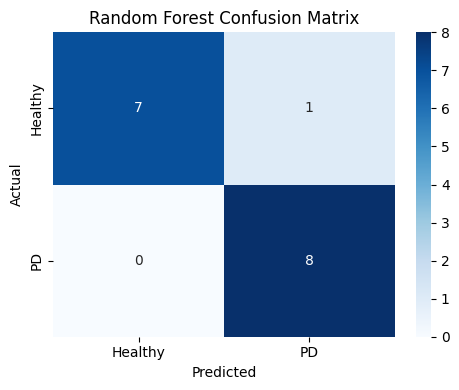


✅ Model saved to: C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/rf_pd_model.pkl
✅ Scaler saved to: C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/scaler.pkl


In [5]:
# ✅ Step 3: Train Model and Save
model_save_path = 'C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/rf_pd_model.pkl'
scaler_save_path = 'C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/scaler.pkl'

train_and_save_rf(file_path, model_save_path, scaler_save_path)


In [6]:
# ✅ Step 4: Load Trained Model
model = load_model(model_save_path)

✅ SHAP summary plot saved to: C:/Users/isgis/OneDrive/Desktop/NeuroKey/outputs/shap_plots/shap1.png


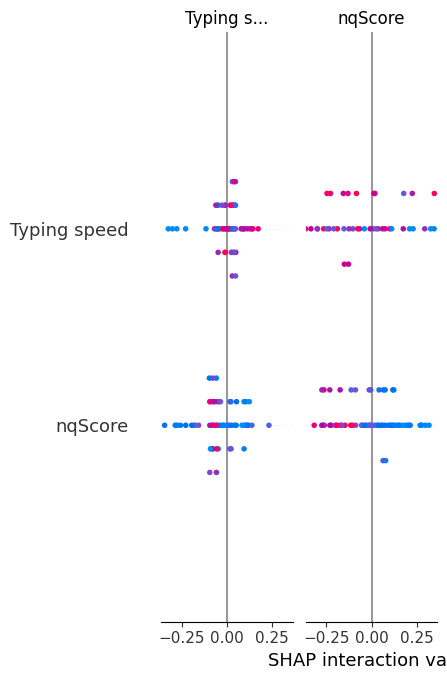

In [7]:
# ✅ Step 5: SHAP Global Explanation
explain_model(model, X_train, feature_names, save_summary_path='C:/Users/isgis/OneDrive/Desktop/NeuroKey/outputs/shap_plots/shap1.png')

In [13]:
import pickle
import pandas as pd

# Load model
with open('C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/rf_pd_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load scaler
with open('C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)
print("Model classes:", model.classes_)

Scaler mean: [9.42670667e-02 1.06440208e+02 1.12537500e+02 1.68379167e+02]
Scaler scale: [ 0.0849326  53.5483582  28.28006604 19.75123897]
Model classes: [0 1]


In [14]:
# Create sample input (try different values here)
input_sample = pd.DataFrame([{
    'nqScore': 1.0,
    'Typing speed': 5.0,
    'afTap': 1.0,
    'sTap': 1.0
}])

print("\nManual Input (raw):\n", input_sample)

# Scale input
scaled_sample = scaler.transform(input_sample)
print("\nManual Input (scaled):\n", scaled_sample)



Manual Input (raw):
    nqScore  Typing speed  afTap  sTap
0      1.0           5.0    1.0   1.0

Manual Input (scaled):
 [[10.66413775 -1.89436636 -3.94403251 -8.47436289]]


In [15]:
# Predict
pred_class = model.predict(scaled_sample)
pred_prob = model.predict_proba(scaled_sample)[0][1]

print("\nPredicted Class:", pred_class)
print("Predicted Probability:", pred_prob)



Predicted Class: [0]
Predicted Probability: 0.5


In [16]:
import pandas as pd

df = pd.read_csv('C:/Users/isgis/OneDrive/Desktop/NeuroKey/data/processed/features_combined.csv')
print(df[['nqScore', 'Typing speed', 'afTap', 'sTap']].describe())


         nqScore  Typing speed       afTap        sTap
count  85.000000     85.000000   76.000000   85.000000
mean    0.094529    105.211102  112.625000  166.911765
std     0.080379     51.970479   30.195516   20.848401
min    -0.011150     21.777780   49.500000   98.000000
25%     0.041333     65.818180   92.750000  157.000000
50%     0.070350     99.921570  115.125000  169.000000
75%     0.107535    137.629600  131.125000  179.000000
max     0.417310    257.166700  213.000000  213.000000


In [19]:
sample = pd.DataFrame([{
    'nqScore': 0.15,
    'Typing speed': 80.0,
    'afTap': 100.0,
    'sTap': 140.0
}])


scaled_sample = scaler.transform(sample)
print("Predicted class:", model.predict(scaled_sample))
print("Predicted probability:", model.predict_proba(scaled_sample)[0][1])


Predicted class: [1]
Predicted probability: 0.95
